<a href="https://colab.research.google.com/github/jagadish9084/learnbay-ds-ml-course/blob/main/ml_models/supervised/decision_tree_classifier/hotel_booking__cancellation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Hotel Booking Cancellation Prediction



## Column Name	Descriptions


1. **Booking_ID**:	Unique identifier for each booking.
2. **number of adults:**	The number of adults included in the booking.
3. **number of children:**	The number of children included in the booking.
4. **number of weekend nights:**	The number of weekend nights (Friday and Saturday) included in the booking.
5. **number of week nights:**	The number of weekdays (Monday to Thursday) included in the booking.
6. **type of meal:**	The type of meal plan selected by the guest (e.g., Meal Plan 1, Not Selected).
7. **car parking space:**	Indicates if a car parking space was requested or included in the booking(1 = Yes, 0 = No).
8. **room type:**	The type of room booked by the guest (e.g., Room_Type 1).
9. **lead time:**	The number of days between the booking date and the check-in date.
10. **market segment type:**	The channel through which the booking was made (e.g., Online, Offline).
11. **repeated:**	Indicates if the guest is a repeated customer (1 = Yes, 0 = No).
12. **P-C:**	Number of previous bookings that were canceled by the customer prior to the current booking.
13. **P-not-C:**	Number of previous bookings not canceled by the customer prior to the current booking.
14. **average price:**	The average price per night for the booking.
15. **special requests:**	The number of special requests made by the guest (e.g., room preferences, amenities).
16. **date of reservation:**	The date when the reservation was made (MM/DD/YYYY format).
17. **booking status:**	The status of the booking, indicating whether it was canceled or not (e.g., Canceled, Not_Canceled).

Source: https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction/data

# Data Cleaning and Feature Engineering

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
import warnings

warnings.filterwarnings('ignore')

In [ ]:
#Load data
data = pd.read_csv('/content/sample_data/booking.csv')
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
# Delete Booking_ID column as it does not provide any meaningfull information for analysis or modeling
data.drop(['Booking_ID'], axis=1, inplace=True)

In [ ]:
# Standardise the columns name
data.columns = data.columns.str.strip().str.lower().str.replace('[\s-]+','_', regex=True)
print(f"Column names after standardisation: {data.columns}")

Column names after standardisation: Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'type_of_meal', 'car_parking_space',
       'room_type', 'lead_time', 'market_segment_type', 'repeated', 'p_c',
       'p_not_c', 'average_price', 'special_requests', 'date_of_reservation',
       'booking_status'],
      dtype='object')


In [ ]:
# Convert the date_of_reservation type to pandas datetime
data['date_of_reservation'] = pd.to_datetime(data['date_of_reservation'], errors='coerce')
print(f"Number of rows with invalid date format: {data['date_of_reservation'].isna().sum()}")

Number of rows with invalid date format: 37


In [ ]:
# Drop rows with invalid date format
data.dropna(axis=0, how='any', inplace=True)
print(f"Number of rows with invalid date format: {data['date_of_reservation'].isna().sum()}")

Number of rows with invalid date format: 0


In [ ]:
# date_of_reservation does not provide any meaningfull information for analysis or modeling, however, we can extract the day of the week and month to see if there is any seasonal trends
data['day'] = data['date_of_reservation'].dt.day_of_week
data['month'] = data['date_of_reservation'].dt.month
data.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,date_of_reservation,booking_status,day,month
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,4,10
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,1,11
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,2,2
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,5,5
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,2,4


In [ ]:
# Drop date_of_reservation columns
data.drop(['date_of_reservation'], axis=1,inplace=True)

In [ ]:
# Encode type_of_meal
# data['type_of_meal'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2,  'Meal Plan 3': 3})
# data['room_type'].map({'Room_Type 1': 1, 'Room_Type 4': 4, 'Room_Type 2' : 2, 'Room_Type 6': 6,
#        'Room_Type 5': 5, 'Room_Type 7': 7, 'Room_Type 3': 3})
# data['market_segment_type'].map({'Offline': 1, 'Online': 2, 'Corporate', 'Aviation', 'Complementary'})

label_encoder = LabelEncoder()
columns_to_be_encoded = data.select_dtypes(exclude=np.number).columns
print(f"Columns to be encoded: {columns_to_be_encoded}")
for col in columns_to_be_encoded:
  data[col] = label_encoder.fit_transform(data[col])


Columns to be encoded: Index(['type_of_meal', 'room_type', 'market_segment_type', 'booking_status'], dtype='object')


In [ ]:
data.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,day,month
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,1,4,10
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,1,1,11
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,0,2,2
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,0,5,5
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,0,2,4


In [ ]:
# Split features and target
X = data.drop(['booking_status'], axis=1)
y= data[['booking_status']]
print(f'Dimentions of X: {X.shape}')
print(f'Dimentions of y: {y.shape}')

Dimentions of X: (36248, 16)
Dimentions of y: (36248, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
print(f"Dimention of X_train: {X_train.shape}")
print(f"Dimention of X_test: {X_test.shape}")
print(f"Dimention of y_train: {y_train.shape}")
print(f"Dimention of y_test: {y_test.shape}")

Dimention of X_train: (27186, 16)
Dimention of X_test: (9062, 16)
Dimention of y_train: (27186, 1)
Dimention of y_test: (9062, 1)


# Decision Tree Classifier

In [ ]:
# Build Decison Tree Classifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

Classification report for training set: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8960
           1       1.00      1.00      1.00     18226

    accuracy                           0.99     27186
   macro avg       0.99      0.99      0.99     27186
weighted avg       0.99      0.99      0.99     27186



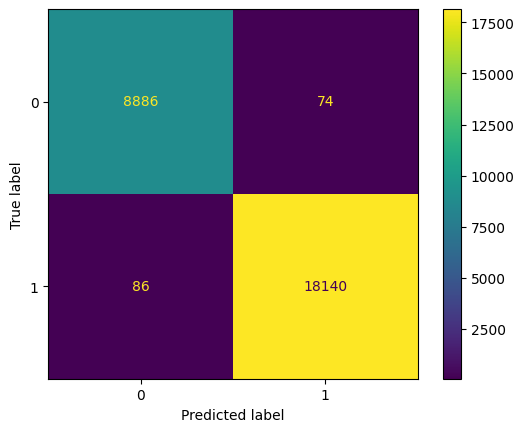

In [ ]:
# Training set predictions
y_pred = tree.predict(X_train)

# Metrics
print(f'Classification report for training set: \n\n{classification_report(y_train, y_pred)}')
cm = ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

Classification report for testing set: 

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2922
           1       0.90      0.89      0.90      6140

    accuracy                           0.86      9062
   macro avg       0.84      0.84      0.84      9062
weighted avg       0.86      0.86      0.86      9062



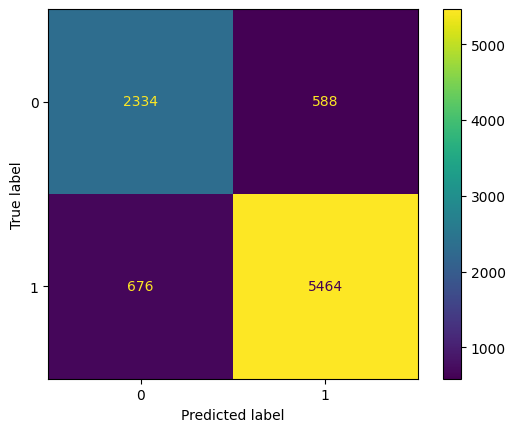

In [ ]:
# Testing set predictions
y_pred = tree.predict(X_test)

# Metrics
print(f'Classification report for testing set: \n\n{classification_report(y_test, y_pred)}')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Training and Testing Performance:

1. Training Accuracy : 0.99%
2. Training Precision: 1.00
3. Training Recall: 1.00

Testing Performance:

1. Testing Accuracy : 0.86
2. Testing Precision: 0.90
3. Testing Recall: 0.89

Analysis:

1. The Training accuracy (99%) is very high but testing accuracy drops significantly to 86%, this suggest a degree of overfitting, meaning the model is capturing the noise in the training data rather than the actual pattern.

2. Training precision is 100% which is excellent, which means, in training set, all postive predictions wre correct. However, the precison drops to 90% for testing set, indicating that the model is making some incorrect postive predictions when applied to new, un seen data

3. Training Recall is 100%,  which means, the model has identified all true postive in training set. On the test set, the recall decreases to 89%, shows that the model is failing to capture some true postive when applied to new, un seen data.

Important metrics for Hotel booking cancelltion:

In hotel booking cancellation prediction, it's crucial to balance the trade-off between precision and recall. Lower recall results in failing to predict cancellations, which leads to revenue loss. On the other hand, lower precision increases incorrect cancellation predictions, leading to higher operational costs.

# Pre Prunning and Hyper Parameter tunning

In [ ]:
# Hyper parameters
param = {
         'criterion': ['gini', 'entropy', 'log_loss'],
         'splitter': ['best', 'random'],
         'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'max_features': ['sqrt', 'log2']
}
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, param_grid=param, n_jobs=-1, cv = 5, scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [492]:
# Best parameter
print(f"Best parameter:\n\n{grid.best_params_}\n")
print(f"Feature Importance:\n\n{pd.Series(grid.best_estimator_.feature_importances_*100, grid.best_estimator_.feature_names_in_, name='Feature Importance')}")

Best parameter:

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}

Feature Importance:

number_of_adults             3.074215
number_of_children           0.323645
number_of_weekend_nights     1.228999
number_of_week_nights        1.897897
type_of_meal                 0.841531
car_parking_space            1.139395
room_type                    0.940530
lead_time                   41.137349
market_segment_type          4.871423
repeated                     0.006402
p_c                          0.003422
p_not_c                      0.033286
average_price               15.479852
special_requests            20.278698
day                          2.292751
month                        6.450605
Name: Feature Importance, dtype: float64


## Most important features:

1. Lead time (41.14): The number of days between the booking date and the arrival date is by far the most important feature. A higher lead time might indicate a higher likelihood of cancellation.

2. Special requests (20.28): Customers with many special requests may have a higher likelihood of canceling, or this could reflect a need for flexibility in their bookings.

3. Average price (15.48): The average price of the booking seems to significantly affect the cancellation rate. Higher prices may lead to higher cancellations if guests find better deals elsewhere.

4. Market segment type (4.87): Different market segments (e.g., direct bookings, corporate clients, online travel agencies) impact cancellation behavior differently.

5. Month (6.45): The month of booking could reflect seasonal patterns affecting cancellations.

6. Day (2.29): Day of the week might also affect cancellations, possibly reflecting typical booking patterns around weekends or weekdays.

7. Number of week nights (1.90) and Number of weekend nights (1.23): The length of stay may impact cancellation likelihood.

Lower importance features such as repeated (0.0064), p_c (0.0034), and p_not_c (0.0333) have minimal influence on the model's predictions, suggesting they may not strongly correlate with cancellations.

Classification report for training set: 

              precision    recall  f1-score   support

           0       0.82      0.66      0.73      8960
           1       0.85      0.93      0.89     18226

    accuracy                           0.84     27186
   macro avg       0.84      0.80      0.81     27186
weighted avg       0.84      0.84      0.84     27186



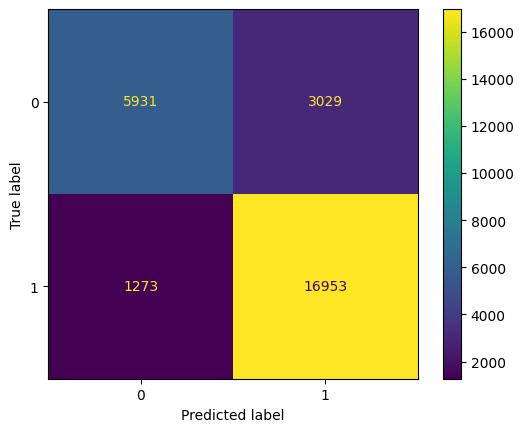

In [ ]:
y_pred = grid.best_estimator_.predict(X_train)

# Metrics
print(f'Classification report for training set: \n\n{classification_report(y_train, y_pred)}')
cm = ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

Classification report for testing set: 

              precision    recall  f1-score   support

           0       0.80      0.62      0.70      2922
           1       0.84      0.92      0.88      6140

    accuracy                           0.83      9062
   macro avg       0.82      0.77      0.79      9062
weighted avg       0.82      0.83      0.82      9062



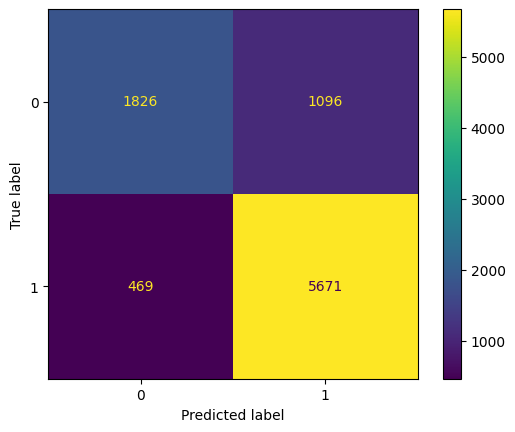

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

# Metrics
print(f'Classification report for testing set: \n\n{classification_report(y_test, y_pred)}')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Analysis for best estimator:

1. Overfitting: The model accuracy is quite same for both testing and testing data, which suggest that the model generalizes very well after cross validation and hyper parameter tuning.
2. Class imbalance: The class 1 (with more smaple) has better precision and recall than the class 0, indicating that the model perform better for the class 1. the lower recall(0.63) for class 0 on test data suggest that the the model missing more actual class 0
3. F-1 score : The Fi-score is having the balance between both training and testing data, with class 1 having consistantly higher. The model handles majority class very well but improvement could be made for class 0( using techniques like SMOTE for class imbalance or using tuning threshold to improve recall)